In [ ]:
!pip install langchain_groq langgraph langchain langchain_community langchain_core langchain_text_splitters langchain_openai chromadb rank_bm25

# 01. Prepare Data

In [ ]:
data =  [{"id":"hotspots_001","title":"HOT SPOTS (ACUTE MOIST DERMATITIS)","content":"Rapidly developing, moist, inflamed lesions caused by self-trauma (scratching/licking). Often painful, may ooze or smell. Causes include allergies, flea bites, trapped moisture, and underlying irritation. First aid: Clip hair around lesion, clean with mild antiseptic, keep area dry, use E-collar to stop licking. Do not use human meds without vet advice. Vet action: Severe or rapidly expanding hot spots often require vet visit within 24 hours; vet may clip, clean, prescribe oral antibiotics or steroids and recommend an E-collar.","tags":["hot_spot","dermatitis","first_aid"],"source":"VCA / PetMD","date":"2025-12-11","severity":"moderate","lang":"en"},
{"id":"pawpad_002","title":"PAW PAD INJURIES","content":"Paw pad injuries include cuts, burns, cracks, foreign bodies or abrasions causing limping, bleeding, or swelling. First aid: Flush with warm water, remove debris if safe, apply sterile saline, light bandage, limit weight bearing. Apply paw balm/antiseptic if recommended. Vet action: Deep wounds, burns, or infected pads commonly need veterinary antibiotics, bandaging, and daily changes. Persistent bleeding -> immediate vet.","tags":["paw_pad","wound","first_aid"],"source":"PetMD / VCA","date":"2025-12-11","severity":"moderate","lang":"en"},
{"id":"rashes_003","title":"RASHES & SKIN ALLERGIES","content":"Red patches, bumps, welts, or generalized itching and hair loss. Causes: flea/allergic dermatitis, contact irritants, insect bites, endocrine disease. First aid: Remove irritant, clean gently, prevent licking, use pet-safe topical soothing products. Vet action: If rash persists >48–72 hours, spreads rapidly, or shows signs of infection, seek veterinary evaluation for diagnostics and prescription therapy.","tags":["rash","allergy","dermatology"],"source":"PetMD","date":"2025-12-11","severity":"mild","lang":"en"},
{"id":"infection_004","title":"SKIN INFECTIONS (BACTERIAL/FUNGAL/YEAST)","content":"Infections present as redness, crusting, scaly patches, hair loss, odor, or pus. First aid: Clean daily with mild antiseptic; for mild superficial yeast/bacterial overgrowth use pet-safe topical antifungal/antibacterial products. Vet action: Culture/diagnostics may be required; systemic antibiotics or antifungals often prescribed for moderate to severe infections.","tags":["infection","bacterial","fungal"],"source":"PetMD","date":"2025-12-11","severity":"moderate","lang":"en"},
{"id":"eye_005","title":"EYE DISCHARGE & CONJUNCTIVITIS","content":"Discharge ranges from clear to thick yellow/green. Mild discharge may be due to dust; thick colored discharge indicates infection. First aid: Clean peri-ocular area gently with warm sterile saline. Avoid topical human meds. Vet action: Persistent discharge >24 hours or signs of pain require veterinary exam; diagnostics like fluorescein or tear tests may be performed.","tags":["eye","conjunctivitis","first_aid"],"source":"AVMA / Spruce Pets","date":"2025-12-11","severity":"moderate","lang":"en"},
{"id":"ear_006","title":"EAR REDNESS & OTITIS","content":"Ear redness, odor, head shaking, scratching; causes include yeast, bacteria, mites, or allergies. First aid: Use pet-safe ear cleaner; clean only visible outer ear. Vet action: Vet may perform cytology and prescribe topical or oral medications for confirmed otitis.","tags":["ear","otitis","first_aid"],"source":"VCA / PetMD","date":"2025-12-11","severity":"moderate","lang":"en"},
{"id":"body_001","title":"OBESITY DETECTION","content":"Signs of obesity include excess fat around ribcage, enlarged abdomen, loss of visible waist, difficulty grooming, slower movement, and heavy breathing. Visual indicators: round body shape, sagging abdomen, reduced muscle definition. First actions: adjust diet, increase controlled exercise. Vet attention recommended if mobility issues or breathing difficulty present.","tags":["obesity","body_condition","weight"],"severity":"moderate","category":"body_scan"},
{"id":"body_002","title":"UNDERWEIGHT DETECTION","content":"Underweight pets show visible ribs, spine, and hip bones, pronounced waist tuck, thin limbs, and low muscle mass. Causes may include malnutrition, chronic illness, parasites, or stress. First actions: increase calorie intake gradually, check feeding schedule, assess eating behavior. Vet required if rapid weight loss is observed.","tags":["underweight","body_condition"],"severity":"moderate","category":"body_scan"},
{"id":"body_003","title":"MUSCLE LOSS (MUSCLE ATROPHY)","content":"Muscle loss appears as thinning limbs, sunken hip area, prominent spine, reduced strength, or uneven muscle between left vs right side. Often linked to aging, arthritis, chronic pain, disuse, or systemic disease. Early actions: moderate exercise, nutrition check, joint supplements. Vet required for sudden or asymmetric muscle loss.","tags":["muscle_loss","atrophy"],"severity":"moderate","category":"mobility"},
{"id":"body_004","title":"LIMPING OR GAIT ABNORMALITY","content":"Limping may be caused by pain, joint disease, soft-tissue injury, paw pad injury, or neurological issues. Visual indicators: favoring one leg, shorter stride, hopping gait, stiffness after resting, or holding a leg up. First steps: restrict movement, inspect paws, avoid jumping. Emergency if pet cannot bear weight at all.","tags":["limping","gait","mobility"],"severity":"moderate","category":"mobility"},
{"id":"body_005","title":"JOINT STIFFNESS","content":"Joint stiffness appears as difficulty rising, slow movements, reluctance to climb stairs, or stiff walking after rest. Causes include early arthritis, obesity stress, or injury. First actions: weight control, warm resting area, light stretching, joint supplements. Vet needed if stiffness worsens or pet cries during movement.","tags":["joint_stiffness","mobility"],"severity":"mild","category":"mobility"},
{"id":"body_006","title":"ARTHRITIS LIKELIHOOD","content":"Signs suggesting arthritis include slow rising, hesitation to jump, limping after exercise, stiff gait, swollen joints, and reduced activity. Full-body posture becomes slouched. Pain may increase in cold weather. Management: weight control, low-impact exercise, warm bedding, anti-inflammatory support. Vet evaluation strongly recommended for long-term joint care.","tags":["arthritis","mobility"],"severity":"moderate","category":"mobility"},
{"id":"body_007","title":"SENIOR POSTURE CHANGES","content":"Senior pets may show hunched posture, lowered head, arched back, stiff tail, slower movement, and reduced muscle mass. Causes include arthritis, spinal pain, organ disease, or chronic weakness. First steps: provide soft bedding, reduce strenuous activity, give joint support. Vet required if posture change is sudden.","tags":["senior_posture","aging"],"severity":"moderate","category":"aging"},
{"id":"body_008","title":"COAT QUALITY ISSUES","content":"Poor coat quality includes dryness, dullness, patchy hair loss, excessive shedding, matting, greasy coat, or dandruff. Causes: nutrition deficiencies, skin infection, parasites, stress, or endocrine issues. First actions: improve grooming routine, omega-3 supplements, bathing schedule check. Vet needed for persistent coat deterioration.","tags":["coat_quality","skin"],"severity":"mild","category":"skin"},
{"id":"body_009","title":"ANXIETY OR ILLNESS POSTURE","content":"Visual anxiety/illness markers include tucked tail, ears back, crouched or low posture, shaking, restlessness, pacing, whale-eye, or avoidance. Illness posture may show arched back, stretching, drooping head, or reluctance to move. First steps: calm environment, remove stress triggers, check temperature/appetite. Emergency if pet shows collapsed posture or severe lethargy.","tags":["anxiety","illness_posture"],"severity":"moderate","category":"behavior"},
{"id":"obesity_001","title":"OBESITY DETECTION","content":"Signs: excess body fat, round shape, sagging abdomen, ribs not easily felt, slow movement, heavy breathing. Causes: overeating, low activity, metabolic issues. Actions: controlled diet, measured feeding, gentle exercise. Vet urgency: moderate if mobility or breathing is affected.","tags":["obesity","body_condition"],"category":"full_body_scan","severity":"moderate"},
{"id":"underweight_002","title":"UNDERWEIGHT DETECTION","content":"Signs: visible ribs, spine, hip bones, thin limbs, low muscle mass. Causes: malnutrition, illness, parasites, stress. Actions: gradual calorie increase, check feeding routine. Vet urgency: needed if rapid weight loss occurs.","tags":["underweight","body_condition"],"category":"full_body_scan","severity":"moderate"},
{"id":"muscleloss_003","title":"MUSCLE LOSS (ATROPHY)","content":"Signs: thinning limbs, sunken hips, prominent spine, unequal muscle left vs right. Causes: aging, chronic pain, arthritis, disuse, systemic illness. Actions: moderate controlled exercise, nutrition adjustment. Vet urgency: sudden or uneven muscle loss requires exam.","tags":["muscle_loss","atrophy"],"category":"full_body_scan","severity":"moderate"},
{"id":"limping_004","title":"LIMPING / GAIT ISSUE","content":"Signs: favoring a leg, shorter stride, stiffness, pet avoids putting weight. Causes: injury, joint disease, paw pad problems, nerve issues. Actions: rest, inspect paws, avoid jumping. Emergency: if pet cannot bear weight at all.","tags":["limping","gait"],"category":"full_body_scan","severity":"severe"},
{"id":"joint_005","title":"JOINT STIFFNESS","content":"Signs: difficulty standing up, stiff walking after rest, reluctance to climb. Causes: early arthritis, age, cold weather, obesity. Actions: weight control, soft bedding, joint supplements. Vet urgency: if stiffness increases or pet cries in pain.","tags":["joint_stiffness","mobility"],"category":"full_body_scan","severity":"moderate"},
{"id":"arthritis_006","title":"ARTHRITIS LIKELIHOOD","content":"Signs: slow rising, limping after activity, stiff gait, swollen joints, reluctance to jump. Actions: weight control, low-impact exercise, warm area. Vet urgency: recommended for long-term management.","tags":["arthritis","mobility"],"category":"full_body_scan","severity":"moderate"},
{"id":"senior_007","title":"SENIOR POSTURE CHANGES","content":"Signs: hunched back, lowered head, slow movement, reduced muscle. Causes: arthritis, spinal pain, organ issues. Actions: reduce strenuous activity, supportive bedding. Vet urgency: sudden posture change must be evaluated.","tags":["senior_posture","aging"],"category":"full_body_scan","severity":"moderate"},
{"id":"coat_008","title":"COAT QUALITY ISSUES","content":"Signs: dull coat, dryness, dandruff, greasy or patchy hair loss. Causes: poor nutrition, infection, parasites, stress. Actions: grooming routine, omega-3 supplements. Vet urgency: if coat worsens continuously.","tags":["coat_quality","skin"],"category":"full_body_scan","severity":"mild"},
{"id":"anxiety_009","title":"ANXIETY OR ILLNESS POSTURE","content":"Signs: tucked tail, ears back, crouched posture, shaking, pacing. Illness posture: arched back, drooping head, unwilling to move. Actions: calm environment, remove stress triggers. Emergency: collapsed posture or severe lethargy.","tags":["anxiety","illness_posture"],"category":"full_body_scan","severity":"severe"},
{"id":"prod_001","title":"PRODUCT SCANNER - OVERVIEW","content":"Purpose: When a user scans packaged pet products (treats, dry food, supplements, shampoos, sprays, litter, paw creams, toys), extract product name, ingredients, nutrition facts, allergen risks, age/breed compatibility, price/value assessment, and suggest safer/better alternatives. Provide short user-friendly summary and an optional detailed analysis for experts.","tags":["product_scanner","overview"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_002","title":"PRODUCT NAME EXTRACTION","content":"Task: Identify brand and product name from label text and prominent packaging text. Normalize variants (e.g., 'Chicken & Rice' -> 'Chicken and Rice'). If name ambiguous, return top 2 likely names and ask user for confirmation. Provide manufacturer when available.","tags":["product_name","normalization"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_003","title":"INGREDIENT BREAKDOWN","content":"Task: Parse ingredient list into ordered array with relative prominence (first-listed = highest proportion). Classify each ingredient into categories: protein, fat, carbohydrate, preservative, binder, flavoring, probiotic, vitamin/mineral, chemical additive. Flag problematic ingredients (e.g., xylitol, artificial sweeteners, high-ME fillers) and give short explanation of concerns.","tags":["ingredients","parsing","safety"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_004","title":"NUTRITIONAL SCORE","content":"Task: Compute a simple nutritional score (0-100) combining macronutrient balance, crude protein %, fat %, fiber, presence of named meat sources, and presence of problematic fillers. Provide brief rationale: e.g., protein quality high (+), excessive added sugar (-), imbalanced fat (-). Include explicit note: score is heuristic and not a substitute for vet dietary advice.","tags":["nutrition","scoring"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_005","title":"ALLERGEN RISK ASSESSMENT","content":"Task: Detect common allergenic ingredients (chicken, beef, dairy, soy, wheat, corn, egg, fish, beef meal) and cross-contamination warnings. Label risk level: Low/Moderate/High. Provide guidance: single-ingredient elimination diets for suspected allergies; recommend vet if severe reaction occurs. If label lists 'may contain' or 'manufactured in facility with', escalate risk level accordingly.","tags":["allergen","risk"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_006","title":"BETTER ALTERNATIVES","content":"Task: Suggest up to 3 better alternatives based on product category and user pet parameters (age, breed, sensitivities). Alternatives prioritized by: ingredient quality, named meat first ingredient, absence of known allergens, better nutritional score, and price/value. Provide short rationale for each alternative.","tags":["alternatives","recommendation"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_007","title":"PRICE / VALUE SCORE","content":"Task: Estimate price-to-value score (0-100) using list price (if provided or user-supplied), per-serving cost estimate, and ingredient/nutrition quality. Higher scores favor named meat proteins, fewer additives, and competitive per-serving price. If price missing, mark score as 'unknown' and prompt user for price or store link.","tags":["price","value"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_008","title":"AGE / BREED COMPATIBILITY","content":"Task: Evaluate compatibility with life stage (puppy/kitten, adult, senior) and breed/size classes (small/medium/large). Use label claims (e.g., 'for puppies') and nutrition profile (calorie density, kibble size, joint supplements). Flag mismatches (e.g., high-calorie for obese pet, large kibble for toy breed).","tags":["compatibility","age","breed"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_009","title":"SUPPLEMENT & MEDICATION INTERACTION CHECK","content":"Task: For supplements listed (glucosamine, chondroitin, fish oil, CBD), provide brief summary of intended benefit and common cautions. If user supplies pet medication list, highlight known interactions or duplicate therapy (e.g., extra anticoagulant risk with high-dose fish oil) and recommend vet consultation for interaction concerns.","tags":["supplements","interaction"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"prod_010","title":"TOY / ACCESSORY SAFETY CHECK","content":"Task: For scanned toys or accessories, detect material types (rubber, rope, hard plastic), choking hazards, small parts, and recommended age/size. Flag recalls if product name matches known recall patterns (prompt user to confirm manufacturer/date). Provide safe-use tips and replacement frequency suggestions.","tags":["toys","safety"],"category":"product_scanner","source":"internal","date":"2025-12-11"},
{"id":"toy_001","title":"TOY SAFETY OVERVIEW","content":"This module analyzes pet toys and accessories for choking hazards, sharp edges, loose components, toxic materials, chew safety risks, durability issues, and age suitability (puppies, adults, seniors). Output includes risk level, warnings, and safer alternatives.","tags":["toy_safety","overview"],"category":"toy_safety","severity":"moderate"},
{"id":"toy_002","title":"CHOKING HAZARD CHECK","content":"Identify small detachable parts, beads, bells, hard plastic fragments, rope strands, torn stuffing, or balls smaller than the pet’s mouth width. Risk Level Guide: Low (no loose pieces), Moderate (soft loose threads), High (small parts that can be swallowed). Always flag high-risk toys for puppies and small breeds.","tags":["choking_hazard","risk"],"category":"toy_safety","severity":"high"},
{"id":"toy_003","title":"SHARP PARTS DETECTION","content":"Check for sharp edges, cracked plastic, splintering wood, exposed wire, metal staples, or cut surfaces. Sharp hazards can lead to mouth injuries, gum cuts, or paw wounds. Recommendation: discard damaged toys immediately; prefer rubber or fabric-based rounded designs.","tags":["sharp_parts","injury_risk"],"category":"toy_safety","severity":"high"},
{"id":"toy_004","title":"LOOSE PIECES & ATTACHMENTS","content":"Detect weak stitching, loose threads, hanging decorations, stuffed toys with open seams, or toys losing fragments during chewing. Loose pieces increase choking and digestive blockage risk. Recommendation: reinforce stitching or replace with heavy-duty chew-resistant toys.","tags":["loose_parts","durability"],"category":"toy_safety","severity":"moderate"},
{"id":"toy_005","title":"TOXIC MATERIAL CHECK","content":"Flag materials such as low-grade plastics, BPA, phthalates, toxic dyes, cheap rubber with chemical odor, or painted surfaces that flake. Risk: ingestion of toxic substances leading to vomiting or long-term organ impact. Recommendation: prefer FDA-compliant, food-grade, or natural rubber toys.","tags":["toxicity","materials"],"category":"toy_safety","severity":"high"},
{"id":"toy_006","title":"CHEW RISK & CHEWING BEHAVIOR","content":"Assess chew style suitability: light chewers, moderate chewers, aggressive chewers. Hard plastic toys can fracture teeth; rope toys may shed fibers; stuffed toys may release filling. Provide matched recommendations based on pet chewing strength and age.","tags":["chew_risk","behavior"],"category":"toy_safety","severity":"moderate"},
{"id":"toy_007","title":"DURABILITY ISSUES","content":"Identify cracks, tears, weak seams, brittle plastic, worn rope knots, or deteriorating rubber. Durability risk is higher for strong chewers and large breeds. Recommendation: choose reinforced stitching, thick rubber, or one-piece molded toys for aggressive chewers.","tags":["durability","chew_resistance"],"category":"toy_safety","severity":"moderate"},
{"id":"toy_008","title":"AGE SUITABILITY (PUPPIES / SENIORS)","content":"Puppies require soft, flexible, small-bite-safe toys supporting teething. Avoid hard plastic which can damage developing teeth. Senior pets require gentle, lightweight toys due to reduced jaw strength and dental sensitivity. Always adjust size and firmness based on life stage.","tags":["age_suitability","puppy","senior"],"category":"toy_safety","severity":"mild"},
{"id":"toy_009","title":"SAFETY RECOMMENDATIONS & ALTERNATIVES","content":"Provide guidance when toy is unsafe: remove damaged toys, replace with safer materials (natural rubber, heavy-duty rope, reinforced fabric). Suggest 2–3 alternatives matching pet size, age, chew level, and activity style.","tags":["alternatives","recommendation"],"category":"toy_safety","severity":"moderate"}]



# 02. Convert JSON into Compatable Document Format

In [ ]:
from langchain_core.documents import Document

docs = []

for item in data:
  text = (
      f"title : {item.get('title')}\n"
      f"content : {item.get('content')}\n"
      f"tags : {item.get('tags')}\n"
      f"category : {item.get('category')}\n"
      f"severity : {item.get('sereverity')}"
  )

  docs.append(
      Document(
          page_content = text,

      )
  )

# 03. Chunk the Documents

In [ ]:
from annotated_types import MaxLen
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 50
)

chunk = splitter.split_documents(docs)
print(len(chunk))

51


# 04. Create Embeddings

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings

emb = HuggingFaceEmbeddings(
    model_name="hkunlp/instructor-large"
)

# 05. Store in ChromaDB

In [ ]:
from langchain_community.vectorstores import Chroma

db = Chroma.from_documents(
    documents = chunk,
    embedding = emb,
    collection_name="pet_db",
    persist_directory="./chroma_pet"
)

db.persist()
print('Documents Stored')

Documents Stored


# 06. Hybrid Retriever

In [ ]:
from langchain_community.vectorstores import FAISS
from rank_bm25 import BM25Okapi

dense_retriever = db.as_retriever(search_type="similarity", k=3)

bm25 = BM25Okapi([doc.page_content.split() for doc in docs])

def hybrid_retriever(query: str):
    # Dense
    dense_docs = dense_retriever.invoke(query) 

    # Sparse
    tokens = query.split()
    sparse_docs = bm25.get_top_n(tokens, docs, n=3)

    # Convert sparse docs to LC Document objects if needed
    sparse_docs = [
        Document(page_content=doc.page_content if hasattr(doc, "page_content") else doc)
        for doc in sparse_docs
    ]

    return dense_docs + sparse_docs


# 07. Create a Rag Prompt


In [ ]:
prompt = """
You are a Veternian with an experience of 10+ years.

Use only information from the context.

If you don't find the answer, say: "I don't know based on the provided data."

Context:
{context}

Question:
{question}

Answer:
"""

# 08. Connect Groq or OpenAI to Generate Answers

In [ ]:
from google.colab import userdata
apikey = userdata.get('groq_key')

# 09. Define RagState

In [ ]:
from typing import TypedDict, List

class RAGState(TypedDict):
  question : str
  documents : list[str]
  answer : str

# 10. Build Nodes

In [ ]:
# retriever Node
def retriever_node(State : RAGState):
  query = State['question']
  docs = hybrid_retriever(query)
  return {"documents": [d.page_content for d in docs]}

In [ ]:
#llm Node
from langchain_groq import ChatGroq

llm = ChatGroq(
    model = "llama-3.3-70b-versatile",
    groq_api_key = apikey
)

def llm_answer_node(state : RAGState):
  question = state['question']
  docs = "\n\n".join(state['documents'])
  prompt = f"""You are a knowledge assistant. Use ONLY the following context:

             {docs}

             Question: {question}
             Answer:
             """.strip()
  response = llm.invoke(prompt)
  return { 'answer': response}

# 11. Build the LangGraph Workflow

In [ ]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(RAGState)

workflow.add_node("retriever", retriever_node)
workflow.add_node('answer', llm_answer_node)

workflow.add_edge(START, "retriever")
workflow.add_edge('retriever', 'answer')
workflow.add_edge('answer', END)

graph = workflow.compile()

# 12. WorkFlow Image

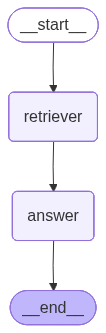

In [ ]:
from IPython.display import display , Image

display(Image(graph.get_graph().draw_mermaid_png()))

# 13. Final Execution

In [ ]:

result = graph.invoke(
    {"question": "Which dog breeds are hypoallergenic?"}
)

print(result["answer"])

content="The provided context does not mention specific dog breeds that are hypoallergenic. It focuses on allergen risk assessment for ingredients and toy safety recommendations. If you're looking for information on hypoallergenic dog breeds, I would need additional context or information." additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 783, 'total_tokens': 836, 'completion_time': 0.203997958, 'completion_tokens_details': None, 'prompt_time': 0.088724958, 'prompt_tokens_details': None, 'queue_time': 0.048661113, 'total_time': 0.292722916}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_93b5f9e564', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019b1186-c1a5-7eb1-a5d7-74947c4e847e-0' usage_metadata={'input_tokens': 783, 'output_tokens': 53, 'total_tokens': 836}
